[데이터 분석과 시각화 - 자동차연비 요인 분석] 
- 데이터셋  : auto_mpg.csv
- 타겟/라벨 : mpg 
- 피쳐/속성 : mpg 컬럼을 제외한 나머지 => 탐색적 분석을 통해서 주요 특성 선택 
 

[1] 모듈 로딩 및 데이터준비 <hr>

In [179]:
# -패키지 설치
# %pip install matplotlib

In [180]:
# [1-1] 모듈 로딩
import pandas as pd                 # 데이터 분석 및 전처리용 모듈
import numpy as np                  # 배열(array)을 지원하는 파이썬 패키지
import matplotlib.pyplot as plt     # 데이터 시각화 즉, 그래프 관련 모듈
import utils                       # 데이터 처리 관련 사용자 정의 모듈

In [181]:
# [1-2] 데이터 준비
D_FILE = '../DATA/auto_mpg.csv'

In [182]:
# - 첫번째 줄 : 컬럼명, 분리자 :,
mpgDF = pd.read_csv(D_FILE)

[2] 데이터 확인 <hr>

In [183]:
## - 요약정보
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [184]:
# - 실제 데이터
# - 데이터 타입 불일치 : horsepower
# - 데이터 특성 체크 : cylinders , origin 
mpgDF.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320


In [185]:
mpgDF.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [186]:
# -컬럼별 통계치 : 데이터 분포

mpgDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [187]:
# -컬럼별 고유값 체크 : 이상치/특이값 사전 체크
# -Series.unique()
print(f"고유값 갯수 : {mpgDF['mpg'].nunique()}")
print(f"고유값 ==> \n : {mpgDF['mpg'].unique()}")


고유값 갯수 : 129
고유값 ==> 
 : [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


In [188]:
## 객체/인스턴스.__dir__() : 속성과 메서드 리스트
# soqndp __iter__ 있으면 for ~ in 가능한 객체/인스턴스
mpgDF.columns.__dir__()

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__rpow__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_accesso

In [189]:
# - 컬럼별 고유값 체크 : 이상치/특이값 사전 체크
# - Series.unique()

utils.print_Unique_Value(mpgDF)



[mpg 컬럼의 고유값]=========
고유값 갯수 : 129
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


[cylinders 컬럼의 고유값]=========
고유값 갯수 : 5
[8 4 6 3 5]


[displacement 컬럼의 고유값]=========
고유값 갯수 : 82
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   7

In [190]:
# 데이터 확인 결과 전처리 --------------------------------------------------------------
# 데이터 값 타입 일치   : horsepower 컬럼 => object ==> int
# 이상치/특이값 처리    : horsepower 컬럼 => '?'
# 데이터 특성 타입 변환 :  origin 컬럼, cylinder 컬럼, model_year 컬럼
# 데이터 단위 변환      : mpg 컬럼 ==> km/l 컬럼 추가
# -------------------------------------------------------------------------------------

[3] 데이터 전처리 <hr>

- 3.1 결측치 (Missing Value) 체크 및 처리

In [191]:
# - 체크 : isna()/isnull() ==> 결측치면 True/ 결측치 아니면 False
mpgDF.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

- 3.2 horsepower 컬럼 처리 : '?'==> 타입처리

In [192]:
# [1] 처리 방법 
# '?' 데이터 처리
# - value_counts() : 고유값에 해당하는 데이터 갯수를 Series로 반환
SR1 = mpgDF['horsepower'].value_counts()
SR1['?']

np.int64(6)

In [193]:
# - '?' 가 들어 있는 행 인덱스
bool_Idx = mpgDF['horsepower'] == '?'

# - '?'가 들어 있는 행들 추출
mpgDF[bool_Idx].index


# - '?'가 들어 있는 행들 삭제
mpgDF2 = mpgDF.drop(index=mpgDF[bool_Idx].index)
mpgDF2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [194]:
# [2] 처리방법  '?' 가 들어있는 행 결측치로 변경
mpgDF3 = mpgDF.replace('?', np.nan)
mpgDF3.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [195]:
# -결측치 삭제 
mpgDF3.dropna(inplace=True)

In [196]:
# 타입 int 로 변경
mpgDF3['horsepower'] = mpgDF3['horsepower'].astype('int')

mpgDF3.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

- 3-2. 데이터 특성 타입 변환 : origin 컬럼 cylinders 컬럼, model_year컬럼

In [197]:
# int64 ==> category 타입으로 형변환

mpgDF3['origin'] = mpgDF3['origin'].astype('category')
mpgDF3['cylinders'] = mpgDF3['cylinders'].astype('category')

mpgDF3.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

- 3-3 mpg컬럼의 단위를 km/l 로 변환 데이터 생성 후 컬럼 추가

In [198]:
# mpg * 0.425 => km/l

kmlSR = mpgDF3['mpg']*0.425

# 새 컬럼으로 추가
mpgDF3['km/l']=kmlSR

In [199]:
mpgDF3.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,km/l
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.650
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.375


In [200]:
# mpg 컬럼 삭제

mpgDF3.drop(columns=['mpg'], inplace=True)

In [201]:
# 전처리 과정에서 삭제된 행으로 인해 인덱스 차이 발생
mpgDF3.shape, mpgDF3.tail(2)

((392, 9),
     cylinders  displacement  horsepower  weight  acceleration  model year  \
 396         4         120.0          79    2625          18.6          82   
 397         4         119.0          82    2720          19.4          82   
 
     origin     car name    km/l  
 396      1  ford ranger  11.900  
 397      1   chevy s-10  13.175  )

In [202]:
# 인덱스 초기화 및 기존 인덱스 행 추가 x설정 => drop = True
mpgDF3.reset_index(drop=True, inplace=True)

[4] 컬럼들의 관계 시각화 <hr>

(392,) (392,)


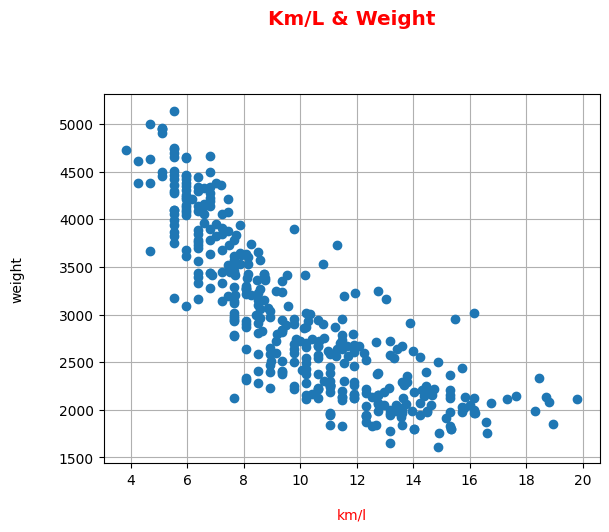

In [203]:
# 연비와 무게 관계 시각화

ydata = mpgDF3['weight']
xdata = mpgDF3['km/l']
print(xdata.shape, ydata.shape)

plt.plot(xdata,ydata, 'o')  

plt.title('Km/L & Weight', pad=50,
        fontdict={'color':'r', 'size':'x-large', 'weight':'bold'} )         # 그래프 제목
plt.xlabel('km/l', labelpad=15, fontdict={'color':'r'})                    # X축 이름
plt.ylabel('weight',  labelpad=25)                                           # Y축 이름
plt.grid()
plt.show()

(392,) (392,)


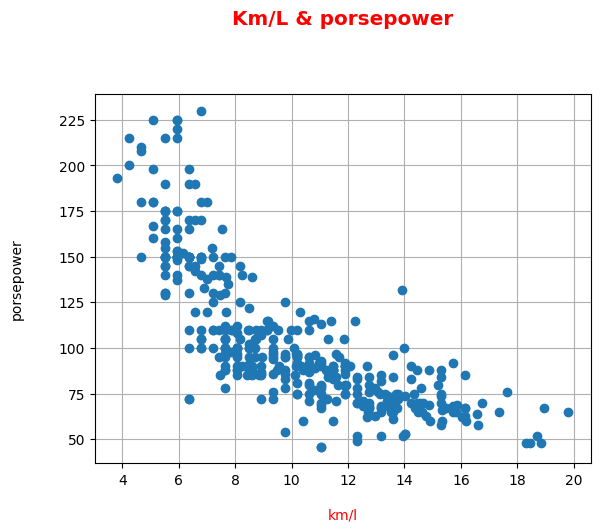

In [204]:
# 연비와 마력 관계 시각화
ydata = mpgDF3['horsepower']
xdata = mpgDF3['km/l']
print(xdata.shape, ydata.shape)

plt.plot(xdata,ydata, 'o')  

plt.title('Km/L & porsepower', pad=50,
        fontdict={'color':'r', 'size':'x-large', 'weight':'bold'} )        # 그래프 제목
plt.xlabel('km/l', labelpad=15, fontdict={'color':'r'})                    # X축 이름
plt.ylabel('porsepower',  labelpad=25)                                     # Y축 이름
plt.grid()
plt.show()

(392,) (392,)


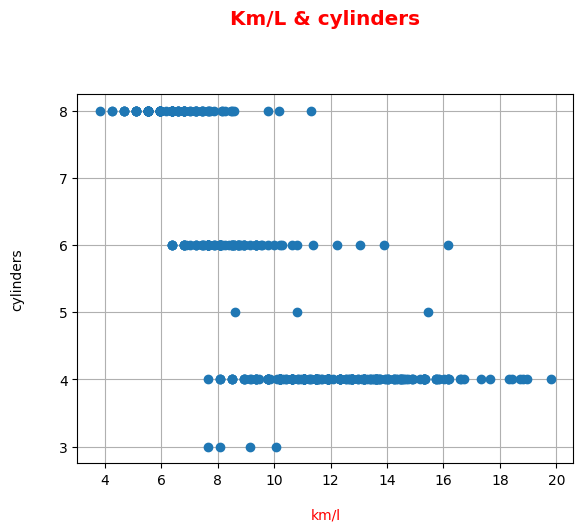

In [ ]:
# 연비와 실린더 관계 시각화
ydata = mpgDF3['cylinders']
xdata = mpgDF3['km/l']
print(xdata.shape, ydata.shape)

plt.plot(xdata,ydata, 'o')  


plt.title('Km/L & cylinders', pad=50,
        fontdict={'color':'r', 'size':'x-large', 'weight':'bold'} )         # 그래프 제목
plt.xlabel('km/l', labelpad=15, fontdict={'color':'r'})                     # X축 이름
plt.ylabel('cylinders',  labelpad=25)                                       # Y축 이름
plt.grid()
plt.show()

(392,) (392,)


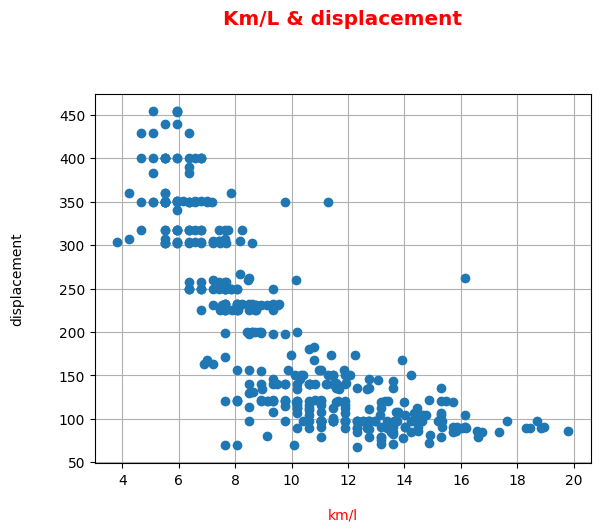

In [207]:
# 연비와 변위 관계 시각화
ydata = mpgDF3['displacement']
xdata = mpgDF3['km/l']
print(xdata.shape, ydata.shape)

plt.plot(xdata,ydata, 'o')  


plt.title('Km/L & displacement', pad=50,
        fontdict={'color':'r', 'size':'x-large', 'weight':'bold'} )         # 그래프 제목
plt.xlabel('km/l', labelpad=15, fontdict={'color':'r'})                    # X축 이름
plt.ylabel('displacement',  labelpad=25)                                           # Y축 이름
plt.grid()
plt.show()

(392,) (392,)


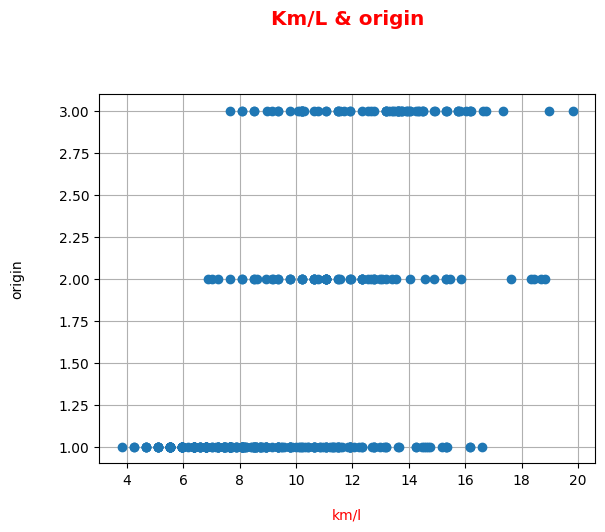

In [208]:
# 연비와 실린더 관계 시각화
ydata = mpgDF3['origin']
xdata = mpgDF3['km/l']
print(xdata.shape, ydata.shape)

plt.plot(xdata,ydata, 'o')  


plt.title('Km/L & origin', pad=50,
        fontdict={'color':'r', 'size':'x-large', 'weight':'bold'} )         # 그래프 제목
plt.xlabel('km/l', labelpad=15, fontdict={'color':'r'})                    # X축 이름
plt.ylabel('origin',  labelpad=25)                                           # Y축 이름
plt.grid()
plt.show()

In [212]:
# 컬럼과 컬럼의 관꼐를 수치로 나타낸 상관 계수

col_names = mpgDF3.columns.drop('car name')
corrDf = mpgDF3[col_names].corr()


# 연비컬럼과 다른 컬럼의 상관관계
corrDf['km/l'].sort_values()[:-1]

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
Name: km/l, dtype: float64

[5] 탐색적 분석결론 <hr>

In [ ]:
# 자동차 연비 요인 분석
# - 무게, 배기량, 출력, 실린더 갯수 등을 봤을때  반비례 관계가 있다.
# - 모델 제조사 등이 연비 요인에서 많은 상관이 있다고 분석이 된다.